In [1]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Mon Mar 7 16:43:03 2022

@author: victor
"""



#/configure -D OPENCV_ENABLE_NONFREE=1.
#import subprocess
#subprocess.call("pip install opencv-contrib-python".split())
#subprocess.call("11Enero".split())
#subprocess.call("pip install -U opencv-python".split())
#subprocess.call("pip install opencv-python==3.4.0.14".split())
#subprocess.call("pip install -i http://pypi.douban.com/simple --trusted-host pypi.douban.com -U opencv-contrib-python".split())
#imports


import cv2 
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def leeimagen(fileName, flagColor):
  # Leer imagen
  imagen = cv2.imread('imagenes/' + fileName)
  
  if(flagColor == 1):
    imagen = cv2.cvtColor(imagen, cv2.COLOR_BGR2RGB)
  elif(flagColor == 0):
    imagen = cv2.cvtColor(imagen, cv2.COLOR_BGR2GRAY)

  return imagen

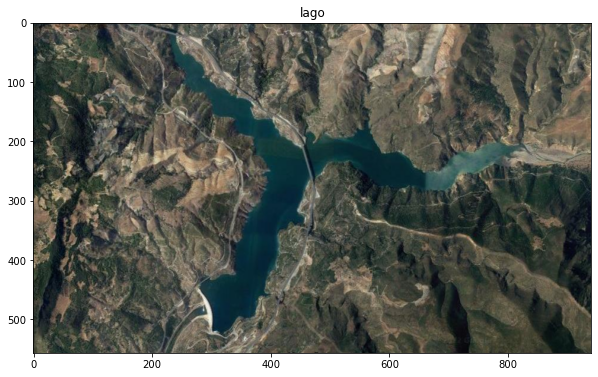

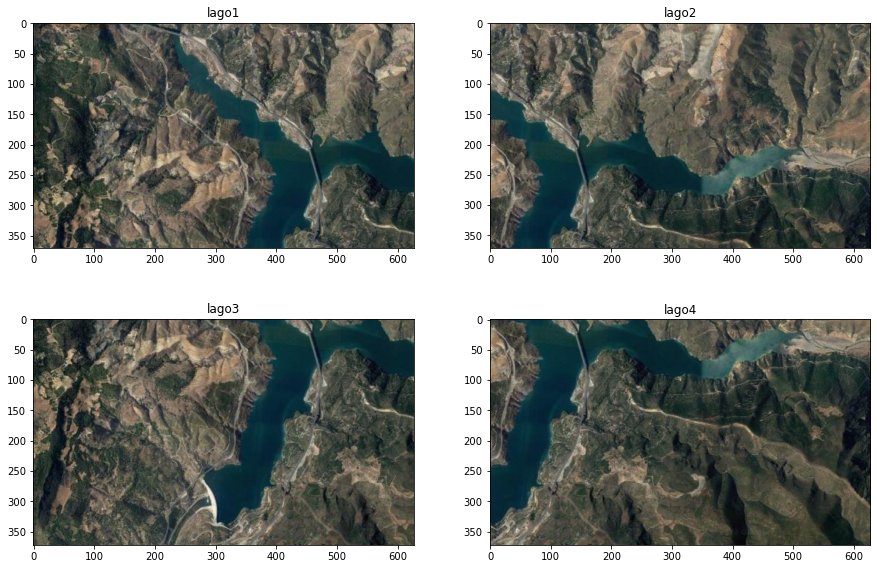

In [3]:
#leo imagen
lago = leeimagen('lago.png', 1)

# fragmento imagen
lago1 = lago[0:int(lago.shape[0]*2/3), 0:int(lago.shape[1]*2/3)]
lago2 = lago[0:int(lago.shape[0]*2/3), int(lago.shape[1]/3):]
lago3 = lago[int(lago.shape[0]/3):, 0:int(lago.shape[1]*2/3)]
lago4 = lago[int(lago.shape[0]/3):, int(lago.shape[1]/3):]

# Muestro resultados
fig = plt.figure(figsize=(10,10))
plt.title("lago")
plt.imshow(lago, cmap="gray")
plt.show()

fig = plt.figure(figsize=(15,10))
ax = plt.subplot(2, 2, 1)
ax.set_title("lago1")
ax.imshow(lago1, cmap='gray')

ax = plt.subplot(2, 2, 2)
ax.set_title("lago2")
ax.imshow(lago2, cmap='gray')

ax = plt.subplot(2, 2, 3)
ax.set_title("lago3")
ax.imshow(lago3, cmap='gray')

ax = plt.subplot(2, 2, 4)
ax.set_title("lago4")
ax.imshow(lago4, cmap='gray')
plt.show()

DES: (501, 128)


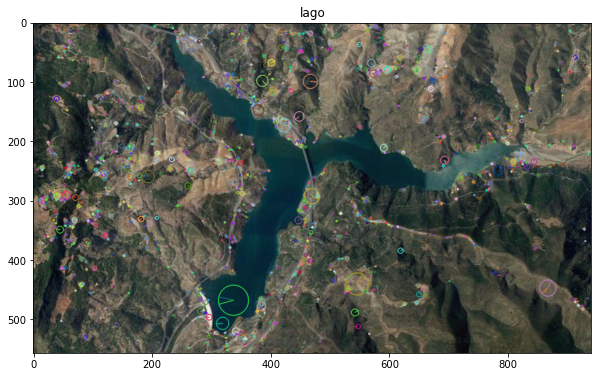

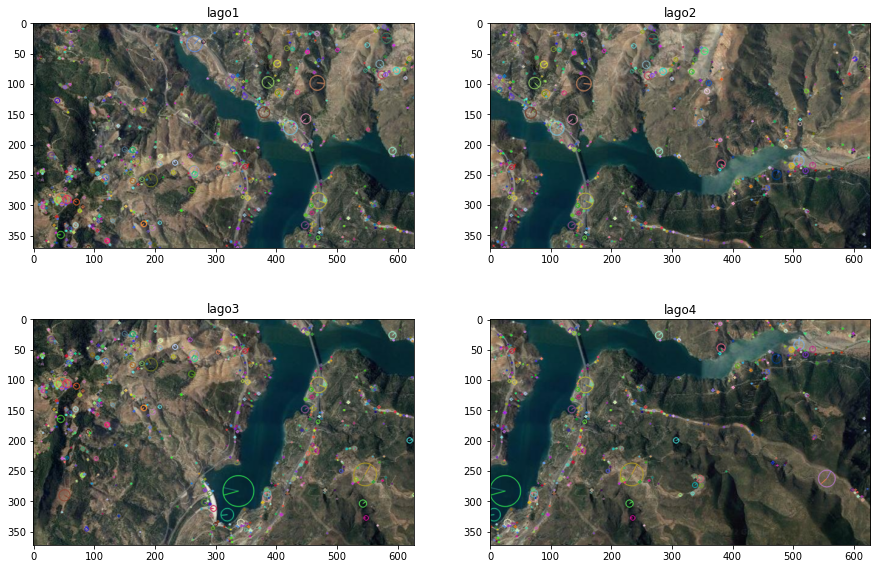

In [4]:
# obtengo keypoints
sift = cv2.SIFT_create(500)

keypoints, descriptors = sift.detectAndCompute(lago,None)
keypoints1, descriptors1 = sift.detectAndCompute(lago1,None)
keypoints2, descriptors2 = sift.detectAndCompute(lago2,None)
keypoints3, descriptors3 = sift.detectAndCompute(lago3,None)
keypoints4, descriptors4 = sift.detectAndCompute(lago4,None)

print ("DES:", descriptors.shape)

# pinto keypoints
img = cv2.drawKeypoints(lago,keypoints,lago, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
img1 = cv2.drawKeypoints(lago1,keypoints1,lago1, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
img2 = cv2.drawKeypoints(lago2,keypoints2,lago2, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
img3 = cv2.drawKeypoints(lago3,keypoints3,lago3, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
img4 = cv2.drawKeypoints(lago4,keypoints4,lago4, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

# Muestro resultados
fig = plt.figure(figsize=(10,10))
plt.title("lago")
plt.imshow(img, cmap="gray")
plt.show()

fig = plt.figure(figsize=(15,10))
ax = plt.subplot(2, 2, 1)
ax.set_title("lago1")
ax.imshow(img1, cmap='gray')

ax = plt.subplot(2, 2, 2)
ax.set_title("lago2")
ax.imshow(img2, cmap='gray')

ax = plt.subplot(2, 2, 3)
ax.set_title("lago3")
ax.imshow(img3, cmap='gray')

ax = plt.subplot(2, 2, 4)
ax.set_title("lago4")
ax.imshow(img4, cmap='gray')
plt.show()

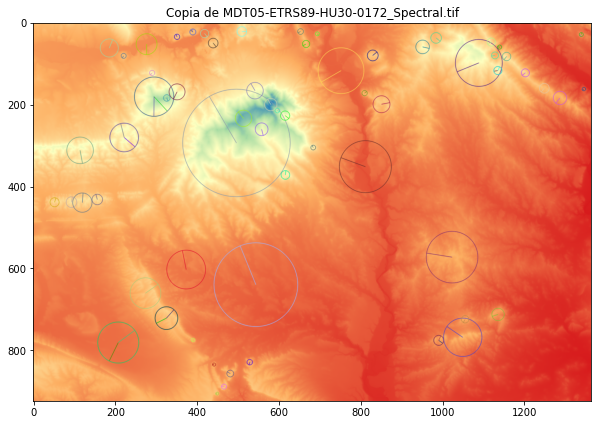

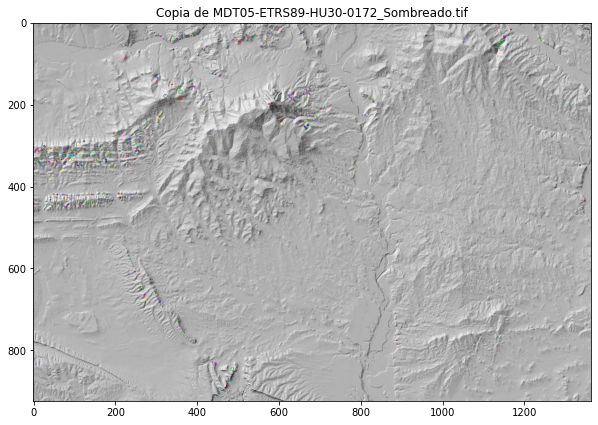

In [5]:
# Otras imagenes
MDT05_ETRS89_copia = leeimagen('Small/Copia de MDT05-ETRS89-HU30-0172_Spectral.tif', 1)
MDT05_ETRS89_copia_sombreado = leeimagen('Small/Copia de MDT05-ETRS89-HU30-0172_Sombreado.tif', 0)

# Redimensiono
MDT05_ETRS89_copia = cv2.resize(MDT05_ETRS89_copia, (int(MDT05_ETRS89_copia.shape[1]/4), int(MDT05_ETRS89_copia.shape[0]/4)))
MDT05_ETRS89_copia_sombreado = cv2.resize(MDT05_ETRS89_copia_sombreado, (int(MDT05_ETRS89_copia_sombreado.shape[1]/4), int(MDT05_ETRS89_copia_sombreado.shape[0]/4)))

# obtengo keypoints
keypoints1, descriptors1 = sift.detectAndCompute(MDT05_ETRS89_copia,None)
keypoints2, descriptors2 = sift.detectAndCompute(MDT05_ETRS89_copia_sombreado,None)

# pinto keypoints
img1 = cv2.drawKeypoints(MDT05_ETRS89_copia, keypoints1, MDT05_ETRS89_copia, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
img2 = cv2.drawKeypoints(MDT05_ETRS89_copia_sombreado, keypoints2, MDT05_ETRS89_copia_sombreado, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

# Muestro resultados
fig = plt.figure(figsize=(10,10))
plt.title("Copia de MDT05-ETRS89-HU30-0172_Spectral.tif")
plt.imshow(img1)
plt.show()

fig = plt.figure(figsize=(10,10))
plt.title("Copia de MDT05-ETRS89-HU30-0172_Sombreado.tif")
plt.imshow(img2)
plt.show()

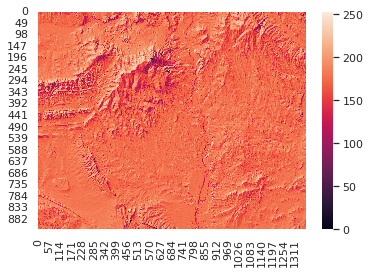

In [6]:
import seaborn as sns
import numpy as np

sns.set_theme()
ax = sns.heatmap(np.asarray(img2[:,:,1]))

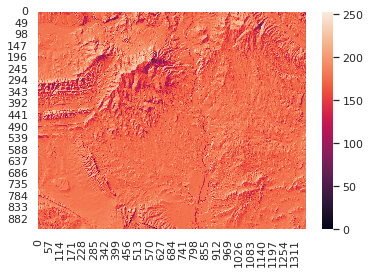

In [7]:
ax = sns.heatmap(np.asarray(MDT05_ETRS89_copia_sombreado))

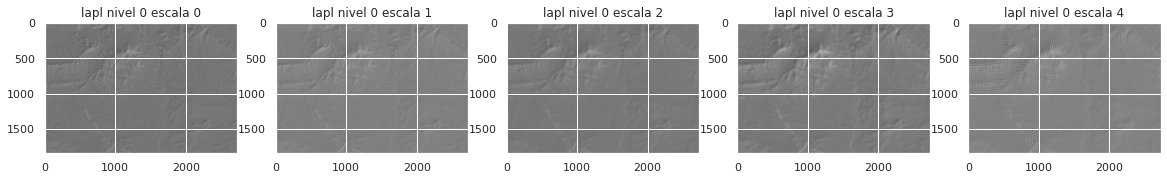

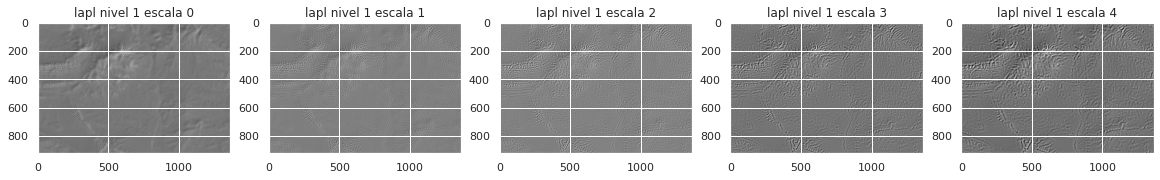

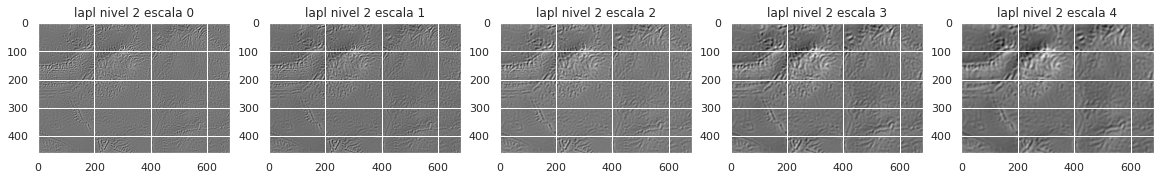

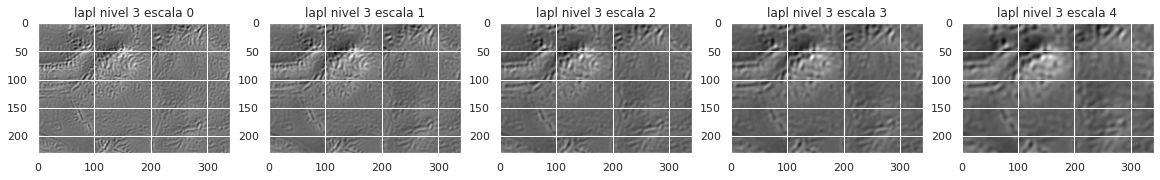

In [8]:
import math
import numpy as np

# Funcion Gaussiana
def gaussian(x, sigma):
    return math.e**(-(x**2)/(2*sigma**2))

# Creo la mascara aplicando la función gaussiana sin derivar
def crearMascara(tam, sigma):
    mask = np.zeros(tam)

    for i in range(len(mask)):
        mask[i] = (i - int(len(mask)/2))

    # Aplico la gaussiana
    mask = gaussian(mask, sigma)

    # Normalizo para que sume 1
    mask = mask/sum(mask)

    return mask

def convolucion(imagen, mh, mv):
    wh = len(mh)   
    wv = len(mv)
    filas = imagen.shape[0]
    columnas = imagen.shape[1]
    tmp = np.ones((filas, columnas-wh+1))
    out = np.empty((filas-wv+1, columnas-wh+1))

    # Convierto mv en una columna
    mv = mv.reshape(mv.shape[0],1)

    # Matriz para convolucion horizontal
    matriz_x = []
    for i in range(filas):
        matriz_x.append(mh)
    matriz_x = np.asarray(matriz_x)

    # Matriz para convolucion vertical
    matriz_y = np.array(mv)
    for i in range(columnas-wh):
        matriz_y = np.append(matriz_y, mv, axis=1)

    # Convolucion horizontal
    for y in range (columnas-wh+1):        
        tmp[:,y] = np.sum(matriz_x * imagen[:, y:y+wh], axis=1)

    # Convolucion vertical
    for x in range (filas-wv+1):
        out[x,:] = np.sum(matriz_y * tmp[x:x+wv, :], axis=0)

    return np.asarray(out)

def normalizar(imagen):
    return ((imagen - np.min(imagen)) / (np.max(imagen)-np.min(imagen))).astype(float)

def padding(im, mh, mv):
    #Calculo el número de componentes de la máscara hasta un componente antes de la mitad 
    num_pix_hor = int(len(mh)/2)
    num_pix_vert = int(len(mv)/2)
    imagen = cv2.copyMakeBorder(im, num_pix_vert, num_pix_vert, num_pix_hor, num_pix_hor, cv2.BORDER_REFLECT)

    return imagen

def calcularOctava(im_ini, num_escalas, sigma_0):
  
    im = im_ini
    octava = np.array([im])
    # Aplico suavizado iterativo
    for s in range(1,num_escalas+3):  # s = 1, ..., ns+2
        sigma_s = sigma_0 * np.sqrt(2**((2*s)/num_escalas) - 2**((2*(s-1))/num_escalas))

        # Calculo mascara
        tam_s = (2*round(sigma_s*2.5)+1)

        mask = crearMascara(tam_s, sigma_s).reshape(-1)
        im = normalizar(im)
        # Añado bordes
        im = padding(im, mask, mask)
        # Convoluciono
        im = convolucion(im, mask, mask)
        im = (normalizar(im) * 255).astype(int)

        octava = np.append(octava, np.array([im]), axis=0)


    return octava

def calcularLowe(imagen, numOctavas, numEscalas, sigma_0):
    imagen_ini = cv2.resize(imagen, (imagen.shape[1]*2, imagen.shape[0]*2))

    lowe = []
    for i in range(numOctavas):
        octava = calcularOctava(imagen_ini, numEscalas, sigma_0)
        lowe.append(octava)
        imagen_ini = octava[3][::2,::2]  # Reducimos el tamaño a la mitad cogiendo las filas y columnas pares

    return lowe


imagen = MDT05_ETRS89_copia_sombreado

# Calcular la piramide de Lowe
lowe = calcularLowe(imagen, 4, 3, 1.6)

# Calcular el espacio de escalas Laplaciano a partir de la pirámide
lapl = []
for octava in lowe:
    nivel = []
    for escala in range(len(octava)-1):
        nivel.append(octava[escala]-octava[escala+1])
    lapl.append(nivel)
    
# Muestro por pantalla
for nivel in range(len(lapl)):
    fig = plt.figure(figsize=(5*len(lapl),5))
    for i in range(len(lapl[nivel])):
        ax = plt.subplot(1, len(lapl[nivel]), i+1)
        ax.set_title("lapl nivel {0} escala {1}".format(nivel, i))
        ax.imshow(lapl[nivel][i], cmap='gray')
    plt.show()

In [9]:
# Identificar los 400 extremos locales con mayor respuesta
extremos = []
valoresExtr = []
sigmas = []
sigma_0 = 1.6
num_escalas = 3

# Cubo 3x3x3
cube = np.zeros((3,3,3))

# Para cada nivel de la piramide laplaciana
for nivel in range(len(lapl)):
    print ("Calculando ...")
    altura = len(lapl[nivel][0])
    anchura = len(lapl[nivel][0][0])
  
    # Cojo capas de la piramide laplaciana de 3 en 3
    for s in range(len(lapl[nivel])-2):
        capa1 = lapl[nivel][s]
        capa2 = lapl[nivel][s+1]
        capa3 = lapl[nivel][s+2]

        # Voy desplazando el cubo por las capas
        for fila in range(altura-3):
            for columna in range(anchura-3):
                cube[0] = capa1[fila:fila+3, columna:columna+3]
                cube[1] = capa2[fila:fila+3, columna:columna+3]
                cube[2] = capa3[fila:fila+3, columna:columna+3]

                # Si el centro del cubo es un maximo lo guardo la oordenada del maximo
                # Para ello tengo que tener en cuenta el cambio de tamaño de la imagen
                if(cube[1,1,1] == np.max(cube) or cube[1,1,1] == np.min(cube)):
                    extremos.append((fila*2**(nivel-1), columna*2**(nivel-1)))
                    valoresExtr.append(abs(cube[1,1,1]))
                    sigmas.append(sigma_0 * np.sqrt(2**((2*(s+1))/num_escalas) - 2**((2*s)/num_escalas)))   # para el sigma de la escala del medio necesito s+1
  
    sigma_0 *= 2  # En cada octava el sigma es el doble

indexSorted = sorted(range(len(extremos)), key= lambda k: valoresExtr[k], reverse=True)

extr_400 = [extremos[i] for i in indexSorted[:400]]
normValExtr = normalizar(valoresExtr)

valoresExtr_400 = [normValExtr[i] for i in indexSorted[:400]]
sigmas400 = [sigmas[i] for i in indexSorted[:400]]

print("Extremos encontrados: ", len(extremos))
print("coordenadas 400 mayores:",extr_400)
print("valores normalizados:",valoresExtr_400)
print("sigmas:",sigmas400)

Calculando ...
Calculando ...
Calculando ...
Calculando ...
Extremos encontrados:  3259359
coordenadas 400 mayores: [(170.0, 602.5), (170.5, 602.0), (170.5, 602.5), (173.5, 592.0), (168.5, 595.0), (430.5, 195.5), (240, 576), (174.0, 598.5), (174.5, 598.0), (65.0, 415.5), (72.0, 422.0), (869, 476), (219.5, 664.0), (341.0, 180.5), (897.0, 460.5), (180.0, 595.5), (635, 287), (635, 288), (635, 288), (172.0, 600.0), (176.5, 597.0), (234.0, 603.0), (181.5, 595.0), (178.5, 596.0), (179.0, 595.5), (179.0, 596.0), (181.0, 595.0), (181.0, 595.5), (181.5, 595.0), (182.0, 595.0), (182.5, 594.5), (185.0, 593.0), (182, 594), (339, 77), (340, 76), (314, 66), (188, 604), (11.0, 609.5), (11.5, 609.5), (24.0, 293.5), (72.5, 424.5), (177.5, 596.5), (178.0, 596.0), (292.5, 103.0), (307.5, 111.5), (438.5, 132.0), (849.0, 469.0), (849.0, 469.5), (169.0, 599.5), (312, 86), (314, 86), (184, 608), (166, 360), (300, 492), (164.0, 592.0), (164.5, 592.0), (186.5, 591.5), (221.5, 639.0), (340.5, 278.0), (418.0, 14

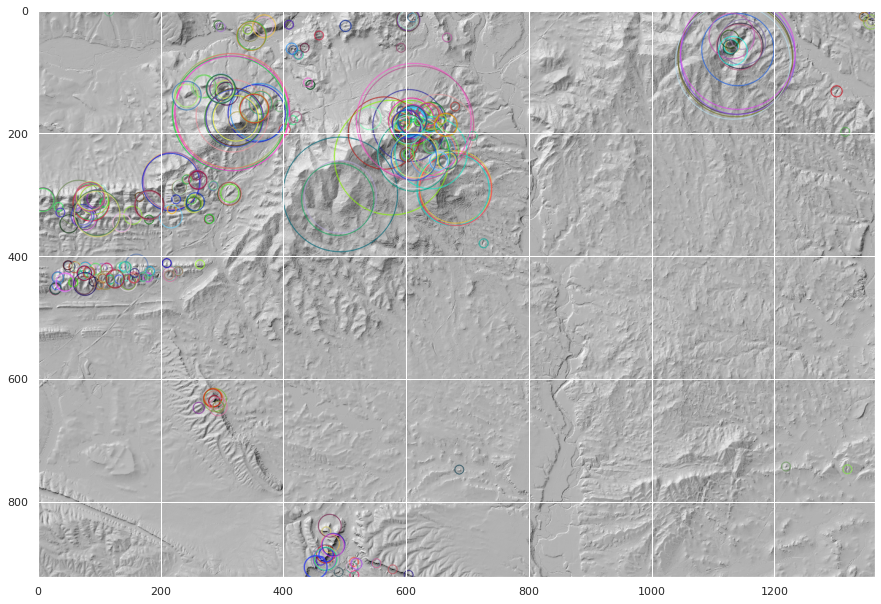

In [10]:
# Genero los keyPoints
keyPoints = []
for i in range(len(extr_400)):
    x = extr_400[i][1]
    y = extr_400[i][0]
    size = 12*sigmas400[i]
    keyPoints.append(cv2.KeyPoint(x, y, size))

# Muestro por pantalla
imagenKP = cv2.drawKeypoints(imagen, keyPoints, imagen, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
fig = plt.figure(figsize=(15,15))
plt.imshow(imagenKP, cmap="gray")
plt.show()

# *Otra implementacion*

In [11]:
#función usada para pintar los objetos
def pintal(im,tamx = 10,tamy = 10):
  
    fig = plt.figure(figsize=(tamx,tamy))
    im_nom = normalizar(np.float64(im))
    im_nom = np.uint8(im_nom*255)
    #si es tribanda la represento sin usar ningun cmap
    if len(im.shape) == 3: 
        plt.imshow(im_nom)
    #si es monobanda uso el cmap de escala de grises
    else:
        im_nom = normalizar(np.float64(im))
        im_nom = np.uint8(im_nom*255)
        plt.imshow(im_nom, cmap = 'gray')


    plt.show(fig)
    cv2.waitKey(0)
    plt.close(fig)

#concateno varias imagenes de distinto tamaño en una misma imagen
def pintaMl(vim,tamx=10,tamy=10): #vim es una secuencia de imagenes

    #hayamos la imagen de mayor altura
    max = 0
    for i in vim:
        if i.shape[0] > max:
            max = i.shape[0]

    #añadimos un parche negro a aquellas fotos que sean más bajas que la foto más alta
    new_vim = []
    for i in vim:
        #si la imagen es más bajita que la más alta entonces añadimos el parche negro
        if i.shape[0] < max:
            #si es tribanda entonces el parche tiene que tener 3 dimensiones
            if (len(i.shape) == 3):
                new_im = np.zeros((max,i.shape[1],3))
            #si es monobanda entonces bastará con 2 dimensiones
            else:
                new_im = np.zeros((max,i.shape[1]))

            new_im[max-i.shape[0]-1:-1,:] = normalizar(np.float64(i[:,:]))
        else:
            new_im = normalizar(np.float64(i))

        #normalizamos la imagen antes de concatenarla para que se vean los colores correctamente
        #new_vim.append(normalizar((new_im)))
        new_vim.append(((new_im)))

    #concatenamos todas las imagenes horizonatalmente
    concatenacion = np.concatenate(new_vim,axis=1)

    #representamos la imagen resultante de la concatenacion
    pintal(concatenacion,tamx,tamy)

#concatenos imagenes con sus titulos correspondientes
def aniadirTitulo(vim,titulos,tamx=10,tamy=10):
    #creo el vector donde añadir las imagenes con la franja blanca aplicada
    new_vim = []
    for i,j in zip(vim,titulos):
        #analizo para ver si las imagen es monobanda o tribanda
        if (len(i.shape) == 3):
            new_im = np.full((i.shape[0]+30,i.shape[1],3),(1,1,1),dtype=np.float64)
        else:
            new_im = np.full((i.shape[0]+30,i.shape[1]),(1),dtype=np.float64)

        #añado al cuadro blanco la imagen y de esta forma me quedará la imagen original con una franja blanca encima 
        new_im[new_im.shape[0]-i.shape[0]-1:-1,:] = normalizar(i[:,:])

        #añado el texto en la franja blanca
        new_img = cv2.putText(new_im,j,(20,22),cv2.FONT_HERSHEY_DUPLEX,0.9,(0,0,0),2,cv2.LINE_AA)
        #extraigo del elemento Umat en una matriz de numpy
        #new_im = new_img.get()
        #la añado al vector
        new_vim.append(new_img)
    #pinto las imagenes con su titulo asociado
    pintaMl(new_vim,tamx,tamy)

In [12]:

def getMascara(sigma=0,tam=0):
    if tam != 0:
        sigma = ((tam-1)/2.5)/2
    else:
        tam = 2*round(sigma*2.5)+1

    #calculo el rango de valores
    cord = np.arange(-int(tam/2),int(tam/2)+1)
    #calculo la máscafra
    mascara = np.exp((-(cord**2))/(2*sigma**2))
    mascara = mascara/np.sum(mascara)
    mascara_d1 = np.exp((-cord**2)/(2*sigma**2))*(((-1)/(sigma**2))*cord)
    mascara_d2 = np.exp((-cord**2)/(2*sigma**2))*(((-1)/(sigma**2))*cord)**2 + np.exp((-cord**2)/(2*sigma**2))*(((-1)/(sigma**2)))

    return mascara,sigma*mascara_d1,sigma**2*mascara_d2

#funcion que uso para añadir los bordes para cada imagen
def preprocesado(imag,tam_mask=0,sigma=0):
    if sigma != 0:
        tam = 2*round(sigma*2.5)+1
    else:
        tam = tam_mask
    #los parámetros que uso son: la imagen a la que añadir los bordes, la cantidad de pixeles que voy añadir por cada lado a la imagen, en este caso tiene que ser igual a la mitad del tamaño de la máscara
    #como las máscaras con impares, me quedo con la mitad, es decir, el resultado de la división entera entre 2 
    new_imag = cv2.copyMakeBorder(imag,tam//2,tam//2,tam//2,tam//2,cv2.BORDER_REFLECT)
    return new_imag 

def submuestrear(img):
    return img[::2,::2]

def generarSemilla(imagen):
    return cv2.resize(imagen, dsize=(imagen.shape[1]*2,imagen.shape[0]*2))

def crearOctava(semilla,ns=3,sigma0=1.6):
    escalas = np.zeros((ns+3,semilla.shape[0],semilla.shape[1]))
    escalas[0,:,:] = semilla
    sigma = sigma0
    imagen = semilla
    for i in range(1,ns+3):
        #calculo el sigma
        sigma = sigma0 * np.sqrt(2**((2*i)/ns) - 2**((2*(i-1)/ns) ))
        #calculo la máscara gaussiana
        m,m1,m2 = getMascara(sigma)
        #preproceso la imagen para aplicar la convolucion
        imagen = preprocesado(imagen,sigma=sigma)
        #suavizo con la convolucion
        imagen = convolucion(imagen,m,m)
        escalas[i,:,:] = imagen

    return list(escalas)

#recordar poner 4 niveles
def piramideLowe(imagen):
    semilla = generarSemilla(imagen)
    octavas = list(range(4))
    for i in range(len(octavas)):
        #creo la octava
        octava = crearOctava(semilla)
        #hago que la imagen semilla tenga la mitad de tamaño
        semilla = submuestrear(octava[3])
        #almaceno la octava
        octavas[i]=octava

    return np.array(octavas,dtype=object)

octavas = piramideLowe(MDT05_ETRS89_copia_sombreado)

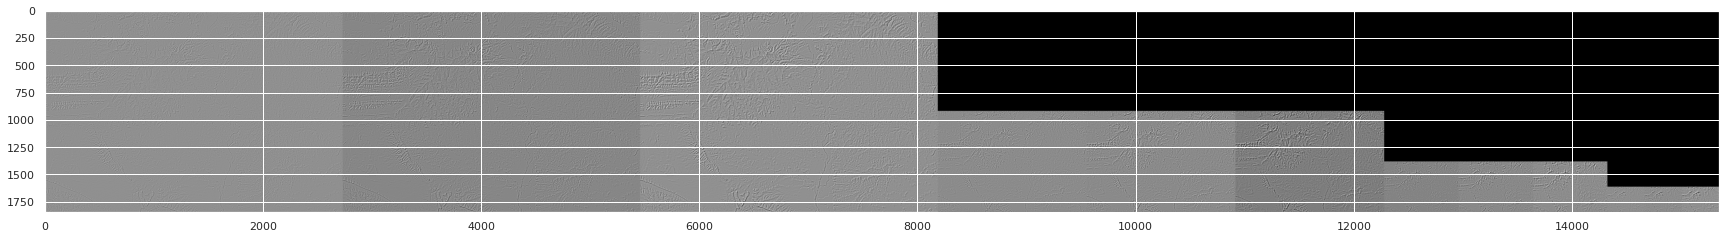

In [13]:
#funcion que me construye el espacio de escalas laplaciano a partir de la piramide de Lowe
def piramideDof(imagen):
    piramide = piramideLowe(imagen)
    #variable en la que almacenamos las DoG por octava
    octavaDoG = list(range(piramide.shape[1]-1))
    #variable en la que almacenamos la piramide
    pir = list(range(piramide.shape[0]))
    #la variable i almacena cada octava de la piramide
    #recorremos todas las octavas
    nivel = 0
    for i in piramide: 
        #recorro cada octava y calculo las diferencias
        for j in range(piramide.shape[1]-1):
            octavaDoG[j] = i[j] - i[j+1]
        #añado las diferencias a la piramide
        pir[nivel] = octavaDoG.copy()
        nivel += 1

    return pir

imagen = MDT05_ETRS89_copia_sombreado
octavas = piramideDof(imagen)

#pinto las capas de la piramide
indices = [1,2,3]
lista = []
for i in range(len(octavas)):
    for j in indices:
        lista.append(octavas[i][j])

pintaMl(lista,30,30)

In [14]:
def extremos(imagen,num_keypoints,octavas=4):
    #calculo el espacio de escalas laplaciano
    pir = piramideDof(imagen)
    pir = np.array(pir,dtype=object)
    #sigma real de la imagen
    sigma0 = 0.8
    #creo la lista donde voy a ir añadiendo los maximos de la forma (sigma,y,x,respuesta,delta,num_octava) = (escala,fila,columna,respuesta,delta,num_octava)
    max_cord = []
    #contador que usaré para saber en que octava me encuentro
    num_octava = 0
    delta = 0.5
    #recorro cada octava y voy buscando los máximos
    for i in pir:
        #creo la matriz con las imagenes de la octava
        matrix = np.array([i[0],i[1],i[2],i[3],i[4]])
        #creo las matrices máscaras para máximos y mínimos
        filtro_max = maximum_filter(matrix,size=(3,3,3))
        filtro_min = minimum_filter(matrix,size=(3,3,3))

        #creo las matrices de booleanos para los máximos y minimo
        maximos = abs(filtro_max - matrix)<0.00001
        maximos = maximos[1:-1,1:-1,1:-1]
        minimos = abs(filtro_min - matrix)<0.00001
        minimos = minimos[1:-1,1:-1,1:-1]

        #obtengo los indices de los maxmios y mínimos locales
        indices = np.where(maximos | minimos)
        #disiminuyo la matriz de valores igual que las de booleanos para poder acceder correctamente a los valores
        matrix = matrix[1:-1,1:-1,1:-1]
        #me creo una lista con todos los puntos extremos guardando la escala, fila, columna, respuesta, delta y número de octava asociada
        max_cord.append([[indices[0][j],indices[1][j],indices[2][j],abs(matrix[indices[0][j],indices[1][j],indices[2][j]]),delta,num_octava] for j in range(len(indices[0]))])

        #incremento en 1 el número de octava
        num_octava += 1
        #multiplico por 2 el delta pues las imágenes en la siguiente octava van a tener la mitad del tamaño
        delta *= 2

    #creo la lista de valores
    puntos_finales = []
    for i in range(octavas):
        #cojo los extremos de la octava i
        puntos = max_cord[i].copy()
        #los ordeno decrecientemente por la respuesta y cojo los n primeros valores con mayor respuesta dependiendo de la octava en la que me encuentre
        keypoints = sorted(puntos,key=lambda k:k[3], reverse=True)[0:num_keypoints[i]]
        #transformo las coordenadas a coordenadas reales tal como explique en la teoría
        puntos_finales.extend([[(2**((j[0]+1 + j[5]*3)/3))*sigma0,j[4]*(j[1]+1),j[4]*(j[2]+1)] for j in keypoints])


    return puntos_finales

In [15]:
def imgInt(im):
    im_nom = normalizar(np.float64(im))
    im_nom = np.uint8(im_nom*255)

    return im_nom

#funcion que añade a la imagen los keypoints que se pasan como lista
def pintarKeyPoints(imagen,keypoints):

    lista = [None]*len(keypoints)

    i = 0
    #creo una lista con elementos del tipo Keypoint de OpenCV 
    for j in keypoints:
        #cada keypoint lo construyo con las coordenadas que le paso en la lista de keypoints obtenida en la función de extremos()
        lista[i] = cv2.KeyPoint(x=j[2],y=j[1],size=(2*j[0]*6))
        i+=1

    #devuelvo la imagen con los keypoints pintados
    return cv2.drawKeypoints(image=imgInt(imagen), keypoints=lista, outImage=None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

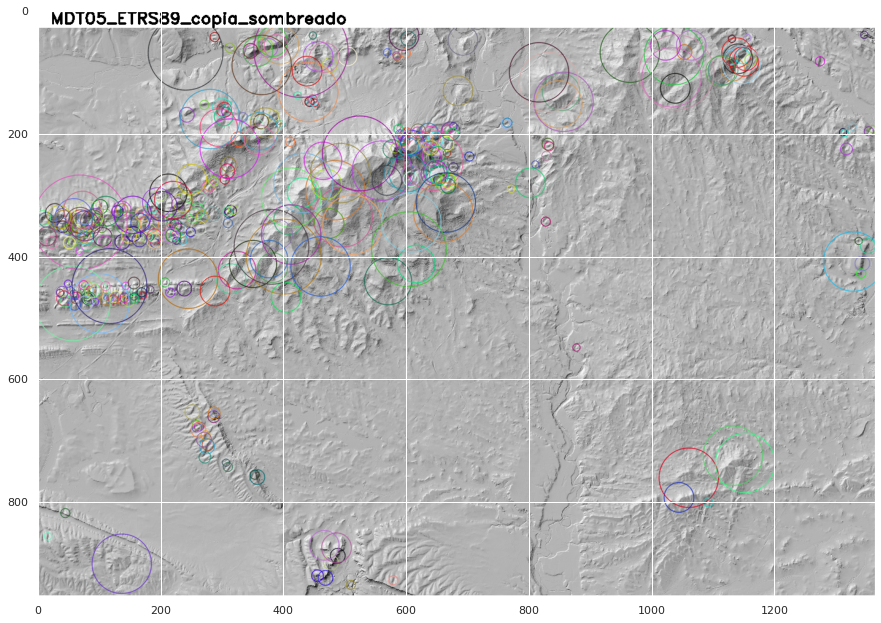

In [16]:
from scipy.ndimage import maximum_filter
from scipy.ndimage import minimum_filter

imagen = MDT05_ETRS89_copia_sombreado

#imagen1
keypoints = extremos(imagen,[200,100,60,40])
resultado = pintarKeyPoints(imagen,keypoints)


aniadirTitulo([resultado],["MDT05_ETRS89_copia_sombreado"],15,15)

In [17]:
print (cv2.__version__)
#from cv2 import xfeatures2d
# obtengo keypoints
#surf = cv2.xfeatures2d.SURF_create(400)
surf = cv2.xfeatures2d.SURF.create()
#surf = cv2.SURF_create(400)

keypoints, descriptors = surf.detectAndCompute(lago,None)
keypoints1, descriptors1 = surf.detectAndCompute(lago1,None)
keypoints2, descriptors2 = surf.detectAndCompute(lago2,None)
keypoints3, descriptors3 = surf.detectAndCompute(lago3,None)
keypoints4, descriptors4 = surf.detectAndCompute(lago4,None)

# pinto keypoints
img = cv2.drawKeypoints(lago,keypoints,lago)
img1 = cv2.drawKeypoints(lago1,keypoints1,lago1)
img2 = cv2.drawKeypoints(lago2,keypoints2,lago2)
img3 = cv2.drawKeypoints(lago3,keypoints3,lago3)
img4 = cv2.drawKeypoints(lago4,keypoints4,lago4)

# Muestro resultados
fig = plt.figure(figsize=(10,10))
plt.title("lago")
plt.imshow(img, cmap="gray")
plt.show()

fig = plt.figure(figsize=(15,10))
ax = plt.subplot(2, 2, 1)
ax.set_title("lago1")
ax.imshow(img1, cmap='gray')

ax = plt.subplot(2, 2, 2)
ax.set_title("lago2")
ax.imshow(img2, cmap='gray')

ax = plt.subplot(2, 2, 3)
ax.set_title("lago3")
ax.imshow(img3, cmap='gray')

ax = plt.subplot(2, 2, 4)
ax.set_title("lago4")
ax.imshow(img4, cmap='gray')
plt.show()

4.5.5


AttributeError: module 'cv2' has no attribute 'xfeatures2d'

In [ ]:
surf = cv2.xfeatures2d.SURF_create(400)

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots()
im = ax.imshow(img2)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(len(vegetables)):
    for j in range(len(farmers)):
        text = ax.text(j, i, harvest[i, j],
                       ha="center", va="center", color="w")

ax.set_title("Harvest of local farmers (in tons/year)")
fig.tight_layout()
plt.show()

print (type(img2))